In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from alex_module import df_prepper
from alex_module import plotter
from alex_module import df_describer

%load_ext lab_black
%load_ext autoreload

In [2]:
df_original = pd.read_csv("raw_data/all_energy_statistics1.csv")
df_original = df_prepper.csv_combiner(df_original, verbose=False)

In [3]:
df = df_prepper.df_groupby_then_flatten(
    df_original,
    cols_to_keep=[
        "country_or_area",
        "commodity_transaction",
        "year",
        "unit",
        "quantity",
        "category",
    ],
    cols_to_groupby=["country_or_area", "year", "category"],
    aggregate="sum",
)

In [4]:
country_groups = df_describer.create_even_groups(
    df=df_original, column="country_or_area", n_groups=15, verbose=False
)

In [6]:
uk = df[df["country_or_area"] == "United Kingdom"].copy()

In [7]:
uk.head()

category,country_or_area,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,...,refinery_gas,solar_electricity,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity
year,,,,,,,,,,,,,,,,,,,,,
1990,United Kingdom,NaN,NaN,NaN,166.0,NaN,NaN,44991.0,NaN,12444.0,...,13983.0,NaN,NaN,246790.0,NaN,2859248.0,176812.0,NaN,799.0,9.0
1991,United Kingdom,NaN,NaN,NaN,128.0,NaN,NaN,52339.0,NaN,12128.0,...,13942.0,NaN,NaN,246174.0,NaN,2907551.0,183533.0,NaN,810.0,11.0
1992,United Kingdom,576.0,NaN,NaN,144.0,NaN,NaN,61451.0,NaN,12381.0,...,13959.0,NaN,NaN,237068.0,NaN,2891357.0,184485.0,NaN,856.0,40.0
1993,United Kingdom,572.0,NaN,NaN,160.0,NaN,NaN,62586.0,NaN,12571.0,...,14994.0,NaN,NaN,227792.0,NaN,2917903.0,192524.0,NaN,881.0,218.0
1994,United Kingdom,548.0,NaN,NaN,158.0,NaN,NaN,70991.0,NaN,13125.0,...,14504.0,NaN,NaN,231306.0,NaN,2937653.0,186200.0,NaN,803.0,342.0


In [8]:
# Selecting only columns with data for every year on record for the best chance for regression
uk.dropna(axis=1, inplace=True)

In [9]:
uk.head()

category,country_or_area,aviation_gasoline,biogases,bitumen,blast_furnace_gas,coke_oven_coke,coking_coal,conventional_crude_oil,direct_use_of_geothermal_heat,direct_use_of_solar_thermal_heat,...,paraffin_waxes,patent_fuel,petroleum_coke,refinery_feedstocks,refinery_gas,thermal_electricity,total_electricity,total_refinery_output,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity
year,,,,,,,,,,,,,,,,,,,,,
1990,United Kingdom,166.0,44991.0,12444.0,351111.0,289331.0,42354.0,1131121.0,99.0,1284.0,...,238.0,3973.0,6862.0,41718.0,13983.0,246790.0,2859248.0,176812.0,799.0,9.0
1991,United Kingdom,128.0,52339.0,12128.0,356442.0,280095.0,40144.0,1206591.0,99.0,1284.0,...,215.0,4346.0,7188.0,46406.0,13942.0,246174.0,2907551.0,183533.0,810.0,11.0
1992,United Kingdom,144.0,61451.0,12381.0,325823.0,254329.0,35732.0,1218251.0,99.0,1284.0,...,284.0,4145.0,9566.0,44766.0,13959.0,237068.0,2891357.0,184485.0,856.0,40.0
1993,United Kingdom,160.0,62586.0,12571.0,324480.0,241152.0,34602.0,1255846.0,99.0,1284.0,...,275.0,7033.0,10099.0,43172.0,14994.0,227792.0,2917903.0,192524.0,881.0,218.0
1994,United Kingdom,158.0,70991.0,13125.0,329171.0,247788.0,34004.0,1307329.0,99.0,1284.0,...,286.0,6099.0,10413.0,38486.0,14504.0,231306.0,2937653.0,186200.0,803.0,342.0


In [10]:
profile = ProfileReport(
    uk, title="Pandas Profiling Report"
)  # minimal = True is for large datasets

In [20]:
profile

Summarize dataset:   0%|          | 0/50 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

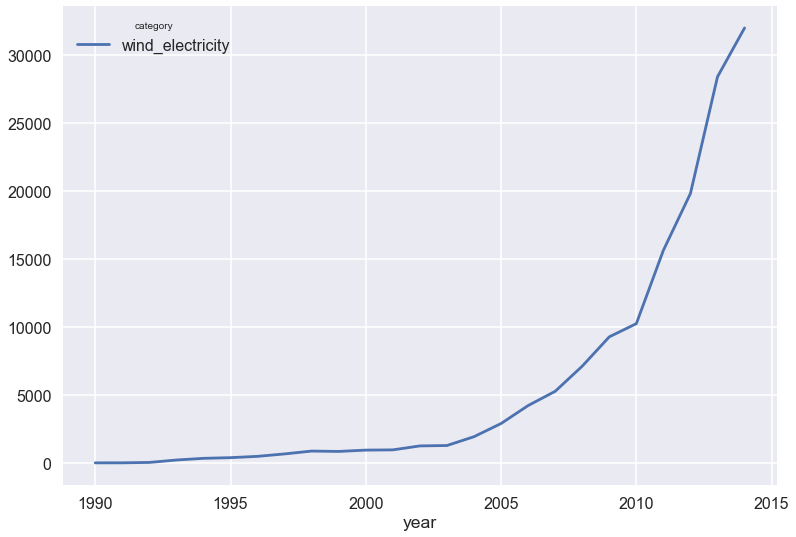

In [11]:
uk[["wind_electricity"]].plot()

In [12]:
uk[["wind_electricity"]]

category,wind_electricity
year,
1990,9.0
1991,11.0
1992,40.0
1993,218.0
1994,342.0
1995,391.0
1996,488.0
1997,667.0
1998,877.0


In [13]:
x = np.array(uk[["wind_electricity"]].index).reshape((-1, 1))
y = np.array(uk[["wind_electricity"]].values)

In [14]:
x

array([[1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]], dtype=int64)

In [15]:
y

array([[9.0000e+00],
       [1.1000e+01],
       [4.0000e+01],
       [2.1800e+02],
       [3.4200e+02],
       [3.9100e+02],
       [4.8800e+02],
       [6.6700e+02],
       [8.7700e+02],
       [8.5000e+02],
       [9.4700e+02],
       [9.6500e+02],
       [1.2560e+03],
       [1.2850e+03],
       [1.9350e+03],
       [2.9040e+03],
       [4.2250e+03],
       [5.2740e+03],
       [7.1240e+03],
       [9.2830e+03],
       [1.0255e+04],
       [1.5652e+04],
       [1.9835e+04],
       [2.8421e+04],
       [3.2015e+04]])

In [16]:
model = LinearRegression()

In [17]:
model.fit(x, y)

LinearRegression()

In [18]:
r_sq = model.score(x, y)
print("coefficient of determination:", r_sq)

coefficient of determination: 0.6309808529145283


In [19]:
print("intercept:", model.intercept_)

intercept: [-1934107.22]


In [20]:
print("slope:", model.coef_)

slope: [[968.99]]


In [21]:
y_pred = model.predict(x)

In [22]:
print("predicted response:", y_pred, sep="\n")

predicted response:
[[-5.817120e+03]
 [-4.848130e+03]
 [-3.879140e+03]
 [-2.910150e+03]
 [-1.941160e+03]
 [-9.721700e+02]
 [-3.180000e+00]
 [ 9.658100e+02]
 [ 1.934800e+03]
 [ 2.903790e+03]
 [ 3.872780e+03]
 [ 4.841770e+03]
 [ 5.810760e+03]
 [ 6.779750e+03]
 [ 7.748740e+03]
 [ 8.717730e+03]
 [ 9.686720e+03]
 [ 1.065571e+04]
 [ 1.162470e+04]
 [ 1.259369e+04]
 [ 1.356268e+04]
 [ 1.453167e+04]
 [ 1.550066e+04]
 [ 1.646965e+04]
 [ 1.743864e+04]]


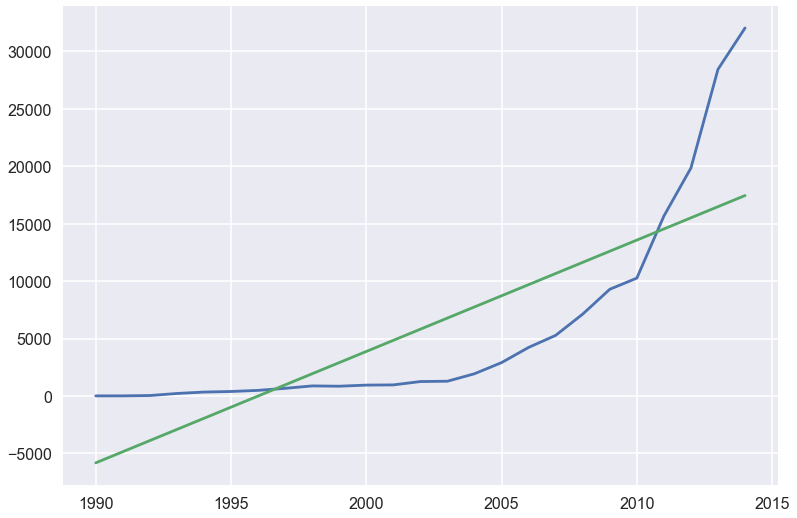

In [23]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y)
ax.plot(x, y_pred)

In [24]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [26]:
x_ = transformer.transform(x)

In [27]:
poly_model = LinearRegression().fit(x_, y)

In [28]:
y_pred_poly = poly_model.predict(x_)

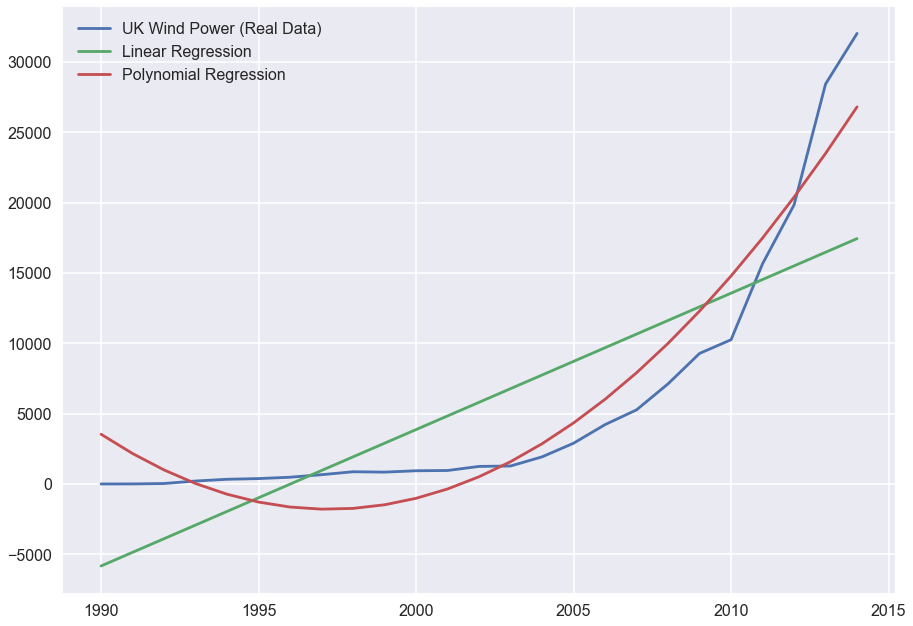

In [29]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="UK Wind Power (Real Data)")
ax.plot(x, y_pred, label="Linear Regression")
ax.plot(x, y_pred_poly, label="Polynomial Regression")

## Fit an exponential model! 


ax.legend()
plt.tight_layout()
plt.savefig(fname="Regression.png")

In [30]:
transformer_ = PolynomialFeatures(degree=5, include_bias=False)

In [31]:
transformer_.fit(x)

PolynomialFeatures(degree=5, include_bias=False)

In [32]:
x_2 = transformer_.transform(x)

In [33]:
poly_model_ = LinearRegression().fit(x_2, y)

In [34]:
y_pred_poly_ = poly_model.predict(x_2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 5)

NameError: name 'y_pred_poly_' is not defined

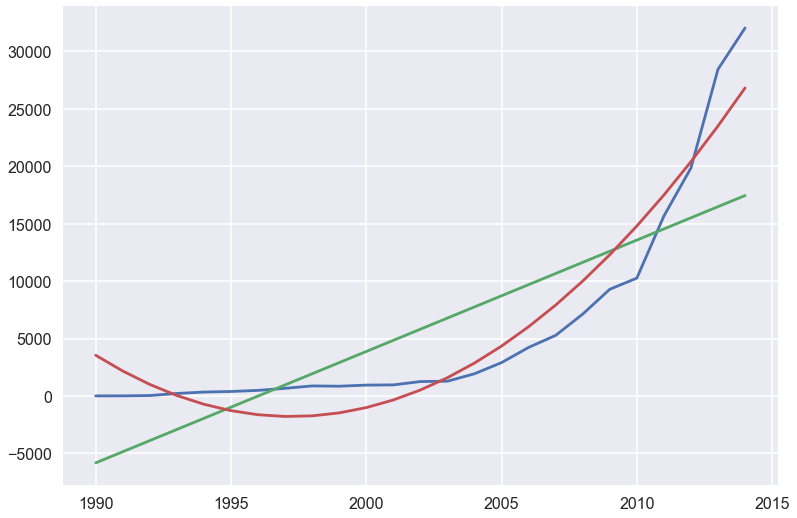

In [30]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, y, label="UK Wind Power (Real Data)")
ax.plot(x, y_pred, label="Linear Regression")
ax.plot(x, y_pred_poly, label="Polynomial Regression")
ax.plot(x, y_pred_poly_, label="Polynomial Regression 5 Degrees")
ax.legend()
plt.tight_layout()
plt.savefig(fname="Regression.png")